In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import splev, splrep
from pprint import pprint

### Задание 3, 4. Численно найти все 5 действительных корней.

In [2]:
def func(z): 
    x, y = z
    f1 = x**2 - y**2 + 3*x*(y**3) - 2*(x**2)*(y**2) +2*x - 3*y - 5
    f2 = 3*(y**3) - 2*(x**2) + 2*(x**3)*y - 5*(x**2)*(y**2) + 5
    return f1, f2

In [3]:
x = np.random.uniform(-5, 5, 100)
n = 7
solv = set()
for x0 in x:
    y0 = np.random.uniform(-10, 10)    
    z0 = (x0, y0)         
    z, info, ier, mesg =  fsolve(func, z0, full_output=True)
    x, y = z
    if ier == 1:
        solv.add((int(x*10**n)/10**n, int(y*10**n)/10**n))
pprint(solv)

{(-3.6530799, -0.2747634),
 (1.273302, 1.6620391),
 (1.3756871, -0.1747579),
 (2.2177536, 0.6101939),
 (2.4943565, 0.7083175)}


### Задание 5

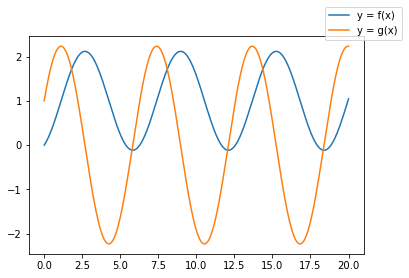

In [4]:
n = 2000
x = np.linspace(0, 20, n)
y1 = []
y2 = []
f = 0
g = 1
y1.append(f)
y2.append(g)
for i in range(1, len(x)):
    f = f + 1/2*g*(x[i]-x[i-1])
    g = g + (2-2*f)*(x[i]-x[i-1])
    y1.append(f)
    y2.append(g)
    
plt.plot(x, y1, label='y = f(x)')
plt.plot(x, y2, label='y = g(x)')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()  

### Задание 6

In [5]:
n1 = 2000
x = np.linspace(0, 20, n1)

f = splrep(x, y1)
g = splrep(x, y2)

f_spl = splev(x, f)
g_spl = splev(x, g)

solv = set()
n2 = 3
for i in range(len(f_spl)):
    if abs(f_spl[i]-g_spl[i]) < 0.011:
        solv.add((int(x[i]*10**n2)/10**n2, int(f_spl[i]*10**n2)/10**n2))
pprint(solv)

{(1.8, 1.71),
 (5.762, -0.113),
 (8.084, 1.71),
 (12.046, -0.113),
 (14.367, 1.71),
 (18.329, -0.113)}
